In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
base_dir = '/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/results_expes/sensibility_analysis/delta_scale'

results_dict = defaultdict(list)

for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(subfolder_path, file)
                
                df = pd.read_csv(file_path)
                
                df.columns = df.columns.str.strip().str.lower()
                
                if 'scale_delta' not in df.columns or 'mean_optim_distortion' not in df.columns:
                    print(f"Warning: Missing required columns in {file_path}. Skipping this file.")
                    continue
                
                for _, row in df.iterrows():
                    scale_delta = row['scale_delta']
                    mean_optim_distortion = row['mean_optim_distortion']
                    
                    if len(results_dict[scale_delta]) < 5:
                        results_dict[scale_delta].append(mean_optim_distortion)

results_dict = dict(results_dict)

for scale_delta, distortions in results_dict.items():
    print(f"scale_delta={scale_delta}: {distortions}")

scale_delta=0.1: [3.111120960712433, 3.090292935371399, 3.065164189338684, 3.07511914730072, 3.094151887893677]
scale_delta=1.0: [2.1964570474624634, 2.1977482557296755, 2.161583981513977, 2.200822122097015, 2.2330660676956176]
scale_delta=5.0: [1.9362258577346805, 1.963850431442261, 1.9900979018211364, 1.904011435508728, 2.039449048042297]
scale_delta=10.0: [1.897038714885712, 1.9584583020210269, 1.949117226600647, 1.9106016159057615, 1.9136204195022584]
scale_delta=15.0: [2.03613276720047, 2.0050273942947388, 2.0668461751937866, 1.956912534236908, 2.027252473831177]
scale_delta=20.0: [2.333035449981689, 2.3990684747695923, 2.676664977073669, 2.520859565734863, 2.415210545063019]
scale_delta=50.0: [3.237708401679993, 3.198092200756073, 3.1632283878326417, 3.2237929940223693, 3.2613953018188475]


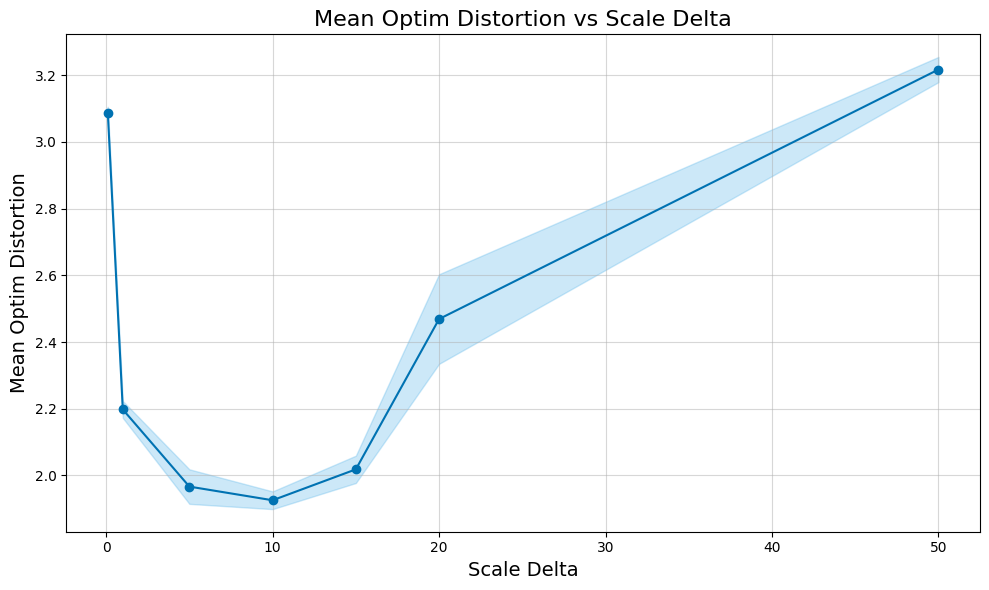

In [9]:
scale_deltas = sorted(results_dict.keys())
means = [sum(distortions) / len(distortions) for distortions in results_dict.values()]
stds = [pd.Series(distortions).std() for distortions in results_dict.values()]

plt.figure(figsize=(10, 6))
plt.plot(scale_deltas, means, label='Mean Optim Distortion', color='#0072B2',  marker='o')  
plt.fill_between(scale_deltas, 
                 [m - s for m, s in zip(means, stds)], 
                 [m + s for m, s in zip(means, stds)], 
                 color='#56B4E9', alpha=0.3, label='±1 Std Dev')

# Add labels and title
plt.xlabel('Scale Delta', fontsize=14)
plt.ylabel('Mean Optim Distortion', fontsize=14)
plt.title('Mean Optim Distortion vs Scale Delta', fontsize=16)
legend = plt.legend(fontsize=12)
legend.remove()
plt.grid(alpha=0.5)
plt.tight_layout()
tikzplotlib.save("sensibility_analysis_sd_plot.tex")
plt.show()